In [1]:
# market_segmentation.py
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
print(os.environ.get("OMP_NUM_THREADS"))

1


In [3]:
# load dataset
file_path = "Indian automoble buying behavour study.csv"
df = pd.read_csv(file_path)

In [4]:
#Select relevant columns
data = df[['Age', 'Make', 'Price']].copy()

In [5]:
# Encode 'Make' into numeric labels
label_encoder = LabelEncoder()
data['Make_encoded'] = label_encoder.fit_transform(data['Make'])

In [6]:
#  Prepare data for clustering (Age, Make_encoded, Price)
X = data[['Age', 'Make_encoded', 'Price']]

In [7]:
# 5Elbow Method for best cluster count
inertia_list = []
K = range(2, 8)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)


In [8]:
#Apply KMeans clustering (Choose k=4 for now)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

In [9]:
#Error Analysis
inertia = kmeans.inertia_   # Sum of squared distances
sil_score = silhouette_score(X, data['Cluster'])

In [10]:
print(f"KMeans Inertia (Lower is better): {inertia:.2f}")
print(f"Silhouette Score (Between -1 and 1): {sil_score:.3f}")

KMeans Inertia (Lower is better): 730923729033.77
Silhouette Score (Between -1 and 1): 0.812


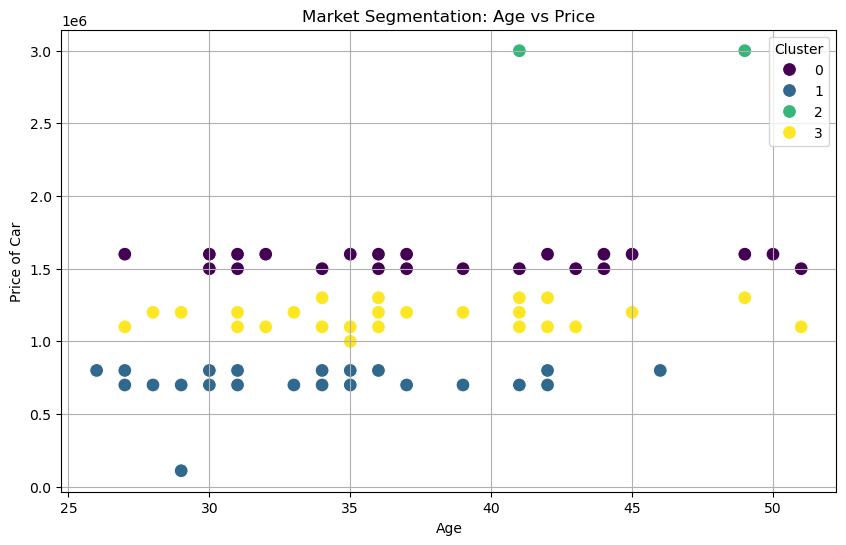

In [11]:
# 8️ Visualize Scatter Plot (Age vs Price)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Price', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Market Segmentation: Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price of Car')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

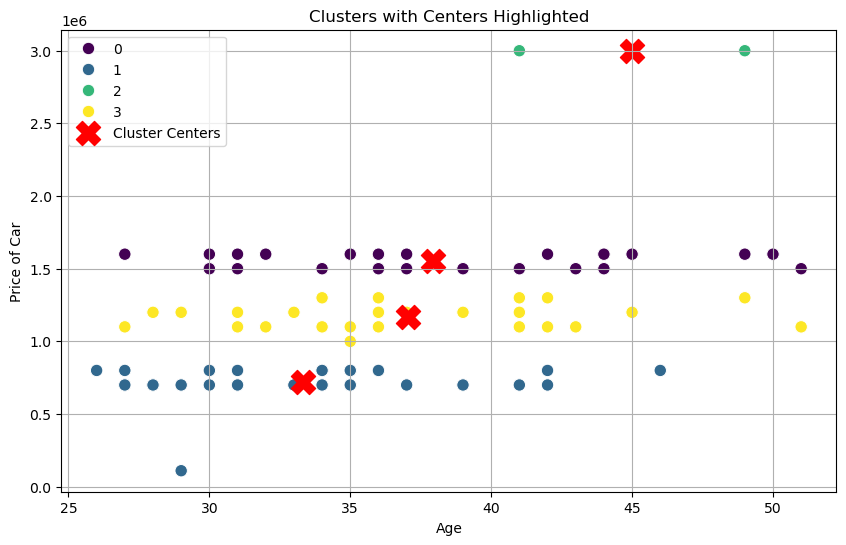

In [12]:
#Visualize Cluster Centers on Scatter Plot
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Price', hue='Cluster', data=data, palette='viridis', s=80)
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=300, marker='X', label='Cluster Centers')
plt.title('Clusters with Centers Highlighted')
plt.xlabel('Age')
plt.ylabel('Price of Car')
plt.legend()
plt.grid(True)
plt.show()

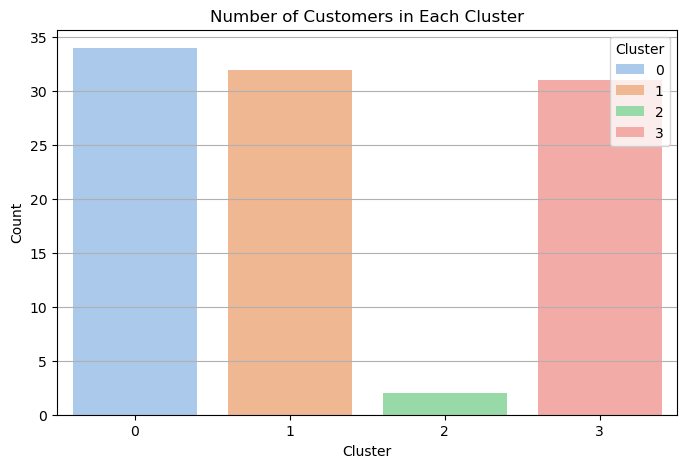

In [13]:
# Bar Chart of Cluster Sizes
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data, hue = 'Cluster', palette='pastel')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

In [14]:
#  Cluster Summary Table
cluster_summary = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Price': 'mean',
    'Make': lambda x: x.value_counts().index[0]  # most common Make
}).reset_index()

print("\n Cluster Summary (Average Values)")
print(cluster_summary)



 Cluster Summary (Average Values)
   Cluster        Age         Price     Make
0        0  37.941176  1.552941e+06      SUV
1        1  33.312500  7.221875e+05   Baleno
2        2  45.000000  3.000000e+06  Luxuray
3        3  37.064516  1.170968e+06     Ciaz


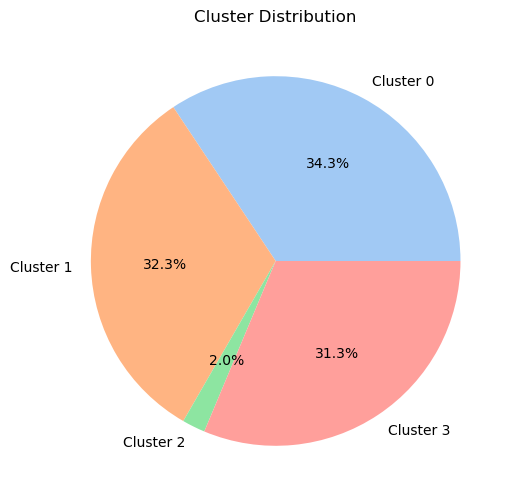

In [15]:
# Pie Chart of Cluster Distribution
cluster_counts = data['Cluster'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index],
        autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Cluster Distribution')
plt.show()
